# Predictive Analytics for Supply Chain (Logistics Focus)
**Author:** Kankati Aneesh

**Goal:** Predict supply chain delays using Random Forest Classifiers.

**Data:** 180k+ Real-world supply chain records (DataCo Dataset).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1')


df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping_date'] = pd.to_datetime(df['shipping date (DateOrders)'])


df['is_late'] = df['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)


model_df = df[[
    'Type', 'Shipping Mode', 'Customer Segment',
    'Order Region', 'Order Country', 'Order City',
    'Latitude', 'Longitude', 'is_late', 'Days for shipping (real)', 'Days for shipment (scheduled)'
]].copy()


print(f"Data Loaded Successfully! Rows: {model_df.shape[0]}, Columns: {model_df.shape[1]}")
model_df.head(3)

Data Loaded Successfully! Rows: 13920, Columns: 11


,Type,Shipping Mode,Customer Segment,Order Region,Order Country,Order City,Latitude,Longitude,is_late,Days for shipping (real),Days for shipment (scheduled)
0,DEBIT,Standard Class,Consumer,Southeast Asia,Indonesia,Bekasi,18.251453,-66.037056,0,3,4
1,TRANSFER,Standard Class,Consumer,South Asia,India,Bikaner,18.279451,-66.037064,1,5,4
2,CASH,Standard Class,Consumer,South Asia,India,Bikaner,37.292233,-121.881279,0,4,4


In [2]:
import plotly.express as px


map_data = df.groupby('Order Country')['is_late'].mean().reset_index()
map_data.columns = ['Country', 'Late_Risk']


fig = px.choropleth(map_data,
                    locations="Country",
                    locationmode='country names',
                    color="Late_Risk",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Reds,
                    title="Global Supply Chain: Late Delivery Risk Heatmap")

fig.show()

In [3]:
import plotly.express as px

risk_chart = df.groupby('Shipping Mode')['is_late'].mean().reset_index()

risk_chart['Late_Risk_Percent'] = risk_chart['is_late'] * 100


fig2 = px.bar(risk_chart,
              x='Shipping Mode',
              y='Late_Risk_Percent',
              color='Late_Risk_Percent',
              title="Which Shipping Mode is Most Unreliable?",
              labels={'Late_Risk_Percent': 'Percentage of Late Orders (%)'},
              color_continuous_scale='Teal')

fig2.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


features = ['Type', 'Shipping Mode', 'Order Region', 'Order Country']
X = pd.get_dummies(df[features], drop_first=True)
y = df['is_late']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("🤖 Training the Random Forest Model... (Please wait)")
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"✅ Model Training Complete!")
print(f"🎯 Model Accuracy: {accuracy:.2f}%")

🤖 Training the Random Forest Model... (Please wait)
✅ Model Training Complete!
🎯 Model Accuracy: 69.94%


/tmp/ipython-input-4213534977.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




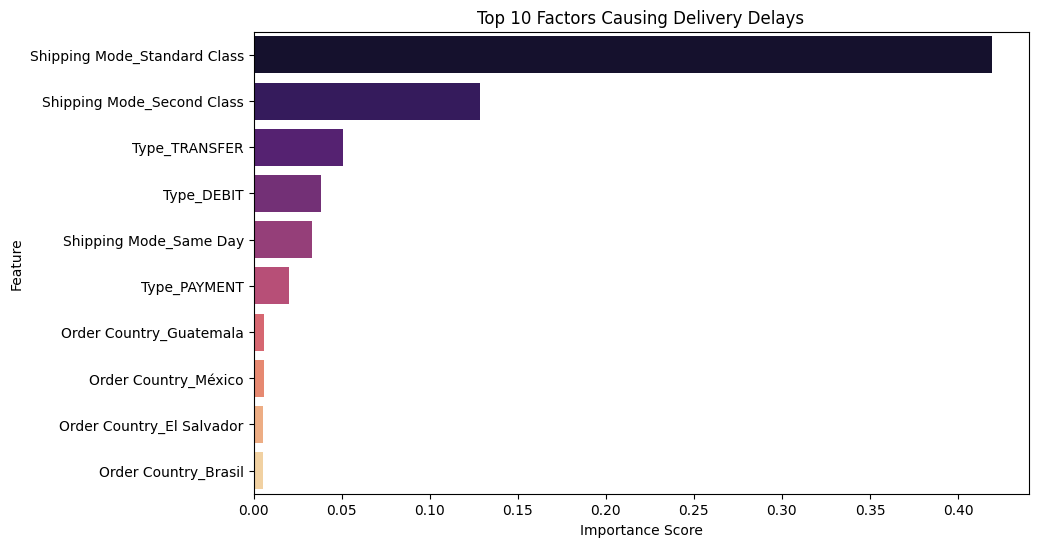

In [5]:
# This extracts the important features that are causing delivery delays
importances = model.feature_importances_
feature_names = X.columns


feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')
plt.title('Top 10 Factors Causing Delivery Delays')
plt.xlabel('Importance Score')
plt.show()